<a href="https://colab.research.google.com/github/Ashvik2008/Projecy115/blob/MASTER/Project115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")

vl_list = df["Velocity"].tolist()
es_list = df["Escaped"].tolist()

fig = px.scatter(x=vl_list, y=es_list)
fig.show()

print(len(vl_list))

100


In [6]:
import numpy as np

vl_array = np.array(vl_list)
es_array = np.array(es_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(vl_array, es_array, 1)

y = []

for x in vl_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=vl_array, y=es_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(vl_array), x1= max(vl_array)
    )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



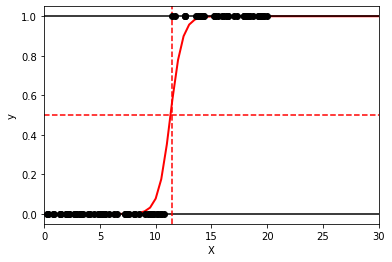

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(vl_list, (len(vl_list), 1))
Y = np.reshape(es_list, (len(es_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
X_test = np.linspace(0, 5000, 10000)#the three numbers are stafrt, stop and number
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, chances, color='r', linewidth=2)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='r', linestyle='--')

# do hit and trial by changing the value of X_test
plt.axvline(x=X_test[23], color='r', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0, 30)
plt.show()